In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import pandas_profiling 

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages

In [2]:
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [3]:
credit= pd.read_csv('CC_GENERAL.csv')
credit.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [5]:
pandas_profiling.ProfileReport(credit)

# Calculating total number of missings in each column

In [6]:
credit.shape[0]-credit.count()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# So, there are 1 missings in Credit_LIMIT and 313 missings in MINIMUM_PAYMENTS
# Impute missings in CREDIT_LIMIT with median & Zero in MINIMUM_PAYMENTS
credit['CREDIT_LIMIT'].fillna(value=credit.CREDIT_LIMIT.median(), inplace = True)
credit['MINIMUM_PAYMENTS'].fillna(value=0, inplace =True)

In [8]:
credit.shape[0]-credit.count()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Derving new KPI's


In [9]:
#Monthly Avarage Purchages 
credit['MONTHLY_AVG_PURCHASE'] = credit['PURCHASES']/credit['TENURE']

In [10]:
#Monthly Cash Advance 
credit['MONTHLY_AVG_CASH_ADVANCE'] = credit['CASH_ADVANCE']/credit['TENURE']

In [11]:
#purchase type
#There aree 4 types of purchase behavior - deriving categorical variables based on the behavior
def purchasetype(credit):
    if ((credit.ONEOFF_PURCHASES == 0) & (credit.INSTALLMENTS_PURCHASES == 0)):
        return 'NONE'
    if ((credit.ONEOFF_PURCHASES > 0) & (credit.INSTALLMENTS_PURCHASES == 0)):
        return 'ONE_OFF'
    if ((credit.ONEOFF_PURCHASES > 0) & (credit.INSTALLMENTS_PURCHASES > 0)):
        return 'ONEOFF_INSTALLMENT'
    if ((credit.ONEOFF_PURCHASES == 0) & (credit.INSTALLMENTS_PURCHASES > 0)):
        return 'INSTALLMENTS'

In [12]:
credit['PURCHASE_TYPE']=credit.apply(purchasetype,axis=1 )

In [13]:
#LIMIT USAGE ( Lower score implies customers are maintaining their balance properly)
credit['LIMIT_USAGE'] = credit['BALANCE']/credit['CREDIT_LIMIT']

In [14]:
#PAYMENT_MINPAYMENT
credit['PAYMENT_MINPAYMENT'] = np.where(credit['MINIMUM_PAYMENTS']== 0, credit['PAYMENTS'], 
                                        credit['PAYMENTS']/credit['MINIMUM_PAYMENTS'])

In [16]:
credit=credit.round(2)
credit.head()

CUST_ID  BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.90               0.82      95.40              0.00   
1  C10002  3202.47               0.91       0.00              0.00   
2  C10003  2495.15               1.00     773.17            773.17   
3  C10004  1666.67               0.64    1499.00           1499.00   
4  C10005   817.71               1.00      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4          0.00                 0.17   
1                     0.0       6442.95                 0.00   
2                     0.0          0.00                 1.00   
3                     0.0        205.79                 0.08   
4                     0.0          0.00                 0.08   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.00                              0.08   
1                        0.00                              0.00   
2                        1.00                              0.00   
3                        0.08                              0.00   
4                        0.08                              0.00   

          ...          CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
0         ...                1000.0    201.80            139.51   
1         ...                7000.0   4103.03           1072.34   
2         ...                7500.0    622.07            627.28   
3         ...                7500.0      0.00              0.00   
4         ...                1200.0    678.33            244.79   

   PRC_FULL_PAYMENT  TENURE  MONTHLY_AVG_PURCHASE  MONTHLY_AVG_CASH_ADVANCE  \
0              0.00      12                  7.95                      0.00   
1              0.22      12                  0.00                    536.91   
2              0.00      12                 64.43                      0.00   
3              0.00      12                124.92                     17.15   
4              0.00      12                  1.33                      0.00   

   PURCHASE_TYPE  LIMIT_USAGE  PAYMENT_MINPAYMENT  
0   INSTALLMENTS         0.04                1.45  
1           NONE         0.46                3.83  
2        ONE_OFF         0.33                0.99  
3        ONE_OFF         0.22                0.00  
4        ONE_OFF         0.68                2.77  

[5 rows x 23 columns]

# Getting Insights from newly dervived KPI's

Text(0, 0.5, 'payment-minimumpayement ratio')

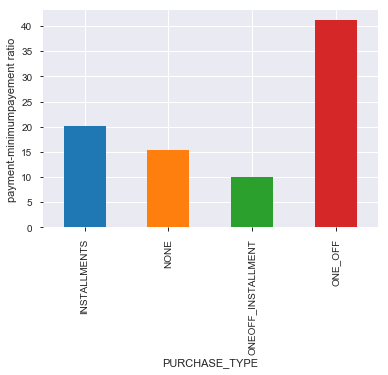

In [17]:
credit.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['PAYMENT_MINPAYMENT'])).plot.bar()
plt.ylabel('payment-minimumpayement ratio')

In [18]:
credit.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['MONTHLY_AVG_PURCHASE'])).plot.bar()
plt.ylabel('MONTHLY_AVG_PURCHASE')

Text(0, 0.5, 'MONTHLY_AVG_PURCHASE')

Text(0, 0.5, 'MONTHLY_AVG_CASH_ADVANCE')

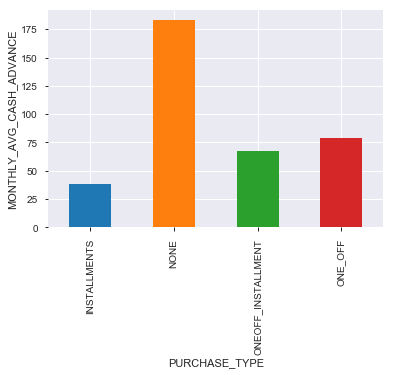

In [19]:
credit.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['MONTHLY_AVG_CASH_ADVANCE'])).plot.bar()
plt.ylabel('MONTHLY_AVG_CASH_ADVANCE')

Text(0, 0.5, 'LIMIT_USAGE')

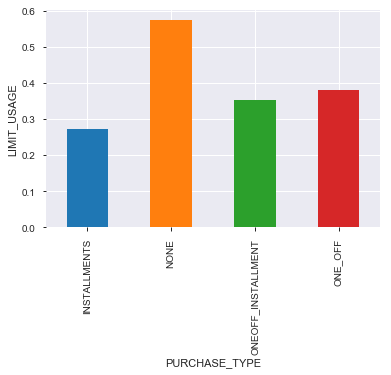

In [20]:
credit.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['LIMIT_USAGE'])).plot.bar()
plt.ylabel('LIMIT_USAGE')

# Insights
- Customers with one off and installments are paying their dues
- Customers with one off and installments do most monthly purchases
- Customers with no one off and installmentstake more monthly cash advance
- Customers with installments have good credit score


# Seperating Numerical & Categorical Variables

In [21]:
numeric_var_names=[key for key in dict(credit.dtypes) if dict(credit.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(credit.dtypes) if dict(credit.dtypes)[key] in ['object']]
print(numeric_var_names)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'MONTHLY_AVG_PURCHASE', 'MONTHLY_AVG_CASH_ADVANCE', 'LIMIT_USAGE', 'PAYMENT_MINPAYMENT']


In [22]:
print(cat_var_names)

['CUST_ID', 'PURCHASE_TYPE']


In [23]:
credit_num=credit[numeric_var_names]
credit_num.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.90               0.82      95.40              0.00   
1  3202.47               0.91       0.00              0.00   
2  2495.15               1.00     773.17            773.17   
3  1666.67               0.64    1499.00           1499.00   
4   817.71               1.00      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4          0.00                 0.17   
1                     0.0       6442.95                 0.00   
2                     0.0          0.00                 1.00   
3                     0.0        205.79                 0.08   
4                     0.0          0.00                 0.08   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.00                              0.08   
1                        0.00                              0.00   
2                        1.00                              0.00   
3                        0.08                              0.00   
4                        0.08                              0.00   

   CASH_ADVANCE_FREQUENCY         ...          PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00         ...                      2        1000.0   
1                    0.25         ...                      0        7000.0   
2                    0.00         ...                     12        7500.0   
3                    0.08         ...                      1        7500.0   
4                    0.00         ...                      1        1200.0   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  MONTHLY_AVG_PURCHASE  \
0    201.80            139.51              0.00      12                  7.95   
1   4103.03           1072.34              0.22      12                  0.00   
2    622.07            627.28              0.00      12                 64.43   
3      0.00              0.00              0.00      12                124.92   
4    678.33            244.79              0.00      12                  1.33   

   MONTHLY_AVG_CASH_ADVANCE  LIMIT_USAGE  PAYMENT_MINPAYMENT  
0                      0.00         0.04                1.45  
1                    536.91         0.46                3.83  
2                      0.00         0.33                0.99  
3                     17.15         0.22                0.00  
4                      0.00         0.68                2.77  

[5 rows x 21 columns]

In [25]:
credit_cat=credit[cat_var_names]
credit_cat.head()

CUST_ID PURCHASE_TYPE
0  C10001  INSTALLMENTS
1  C10002          NONE
2  C10003       ONE_OFF
3  C10004       ONE_OFF
4  C10005       ONE_OFF

# Handling Outliers

In [26]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.95))
    x = x.clip_lower(x.quantile(0.05))
    return x

credit_num=credit_num.apply(lambda x: outlier_capping(x))

# Dropping cust_id and creating dummies for purchase_type

In [27]:
dummies=pd.get_dummies(credit.PURCHASE_TYPE,prefix='PURCHASE_TYPE',drop_first=True)
credit_merg=pd.concat([credit_num,dummies],axis=1)
credit_merg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 24 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null float64
PURCHASES_TRX                       8950 non-null float64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT       

In [29]:
credit_merg.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.90               0.82      95.40              0.00   
1  3202.47               0.91       0.00              0.00   
2  2495.15               1.00     773.17            773.17   
3  1666.67               0.64    1499.00           1499.00   
4   817.71               1.00      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4        0.0000                 0.17   
1                     0.0     4647.1695                 0.00   
2                     0.0        0.0000                 1.00   
3                     0.0      205.7900                 0.08   
4                     0.0        0.0000                 0.08   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.00                              0.08   
1                        0.00                              0.00   
2                        1.00                              0.00   
3                        0.08                              0.00   
4                        0.08                              0.00   

   CASH_ADVANCE_FREQUENCY          ...            MINIMUM_PAYMENTS  \
0                    0.00          ...                     139.510   
1                    0.25          ...                    1072.340   
2                    0.00          ...                     627.280   
3                    0.08          ...                      29.783   
4                    0.00          ...                     244.790   

   PRC_FULL_PAYMENT  TENURE  MONTHLY_AVG_PURCHASE  MONTHLY_AVG_CASH_ADVANCE  \
0              0.00    12.0                  7.95                      0.00   
1              0.22    12.0                  0.00                    425.55   
2              0.00    12.0                 64.43                      0.00   
3              0.00    12.0                124.92                     17.15   
4              0.00    12.0                  1.33                      0.00   

   LIMIT_USAGE  PAYMENT_MINPAYMENT  PURCHASE_TYPE_NONE  \
0         0.04              1.4500                   0   
1         0.46              3.8300                   1   
2         0.33              0.9900                   0   
3         0.22              0.2845                   0   
4         0.68              2.7700                   0   

   PURCHASE_TYPE_ONEOFF_INSTALLMENT  PURCHASE_TYPE_ONE_OFF  
0                                 0                      0  
1                                 0                      0  
2                                 0                      1  
3                                 0                      1  
4                                 0                      1  

[5 rows x 24 columns]

# Dropping variable used in deriving KPI's

In [30]:
credit_new=credit_merg.drop(columns=['BALANCE', 'PURCHASES' ,'PAYMENTS' ,'MINIMUM_PAYMENTS',  'TENURE', 'CASH_ADVANCE' ,
                                     'CREDIT_LIMIT'])
credit_new.head()

BALANCE_FREQUENCY  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0               0.82              0.00                    95.4   
1               0.91              0.00                     0.0   
2               1.00            773.17                     0.0   
3               0.64           1499.00                     0.0   
4               1.00             16.00                     0.0   

   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0                 0.17                        0.00   
1                 0.00                        0.00   
2                 1.00                        1.00   
3                 0.08                        0.08   
4                 0.08                        0.08   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                              0.08                    0.00               0.0   
1                              0.00                    0.25               4.0   
2                              0.00                    0.00               0.0   
3                              0.00                    0.08               1.0   
4                              0.00                    0.00               0.0   

   PURCHASES_TRX  PRC_FULL_PAYMENT  MONTHLY_AVG_PURCHASE  \
0            2.0              0.00                  7.95   
1            0.0              0.22                  0.00   
2           12.0              0.00                 64.43   
3            1.0              0.00                124.92   
4            1.0              0.00                  1.33   

   MONTHLY_AVG_CASH_ADVANCE  LIMIT_USAGE  PAYMENT_MINPAYMENT  \
0                      0.00         0.04              1.4500   
1                    425.55         0.46              3.8300   
2                      0.00         0.33              0.9900   
3                     17.15         0.22              0.2845   
4                      0.00         0.68              2.7700   

   PURCHASE_TYPE_NONE  PURCHASE_TYPE_ONEOFF_INSTALLMENT  PURCHASE_TYPE_ONE_OFF  
0                   0                                 0                      0  
1                   1                                 0                      0  
2                   0                                 0                      1  
3                   0                                 0                      1  
4                   0                                 0                      1

# Visualize correlation matrix in Seaborn using a heatmap

In [32]:
credit_new.corr()

BALANCE_FREQUENCY  ONEOFF_PURCHASES  \
BALANCE_FREQUENCY                          1.000000          0.153093   
ONEOFF_PURCHASES                           0.153093          1.000000   
INSTALLMENTS_PURCHASES                     0.170551          0.319737   
PURCHASES_FREQUENCY                        0.237340          0.394865   
ONEOFF_PURCHASES_FREQUENCY                 0.204455          0.764849   
PURCHASES_INSTALLMENTS_FREQUENCY           0.184937          0.168353   
CASH_ADVANCE_FREQUENCY                     0.199975         -0.121232   
CASH_ADVANCE_TRX                           0.178262         -0.096036   
PURCHASES_TRX                              0.240162          0.638903   
PRC_FULL_PAYMENT                          -0.111096          0.127811   
MONTHLY_AVG_PURCHASE                       0.187500          0.863160   
MONTHLY_AVG_CASH_ADVANCE                   0.103217         -0.097293   
LIMIT_USAGE                                0.457088         -0.078378   
PAYMENT_MINPAYMENT                        -0.271016          0.329245   
PURCHASE_TYPE_NONE                         0.011427         -0.326428   
PURCHASE_TYPE_ONEOFF_INSTALLMENT           0.195059          0.501063   
PURCHASE_TYPE_ONE_OFF                     -0.094511          0.139761   

                                  INSTALLMENTS_PURCHASES  PURCHASES_FREQUENCY  \
BALANCE_FREQUENCY                               0.170551             0.237340   
ONEOFF_PURCHASES                                0.319737             0.394865   
INSTALLMENTS_PURCHASES                          1.000000             0.639187   
PURCHASES_FREQUENCY                             0.639187             1.000000   
ONEOFF_PURCHASES_FREQUENCY                      0.251386             0.501554   
PURCHASES_INSTALLMENTS_FREQUENCY                0.729512             0.862955   
CASH_ADVANCE_FREQUENCY                         -0.200534            -0.332381   
CASH_ADVANCE_TRX                               -0.162689            -0.282074   
PURCHASES_TRX                                   0.714152             0.742356   
PRC_FULL_PAYMENT                                0.238803             0.305791   
MONTHLY_AVG_PURCHASE                            0.702987             0.589410   
MONTHLY_AVG_CASH_ADVANCE                       -0.152414            -0.288256   
LIMIT_USAGE                                    -0.121744            -0.226299   
PAYMENT_MINPAYMENT                              0.259314             0.168837   
PURCHASE_TYPE_NONE                             -0.367340            -0.663350   
PURCHASE_TYPE_ONEOFF_INSTALLMENT                0.485354             0.515609   
PURCHASE_TYPE_ONE_OFF                          -0.347702            -0.217887   

                                  ONEOFF_PURCHASES_FREQUENCY  \
BALANCE_FREQUENCY                                   0.204455   
ONEOFF_PURCHASES                                    0.764849   
INSTALLMENTS_PURCHASES                              0.251386   
PURCHASES_FREQUENCY                                 0.501554   
ONEOFF_PURCHASES_FREQUENCY                          1.000000   
PURCHASES_INSTALLMENTS_FREQUENCY                    0.142607   
CASH_ADVANCE_FREQUENCY                             -0.125092   
CASH_ADVANCE_TRX                                   -0.106399   
PURCHASES_TRX                                       0.638206   
PRC_FULL_PAYMENT                                    0.157709   
MONTHLY_AVG_PURCHASE                                0.656892   
MONTHLY_AVG_CASH_ADVANCE                           -0.124219   
LIMIT_USAGE                                        -0.096114   
PAYMENT_MINPAYMENT                                  0.250475   
PURCHASE_TYPE_NONE                                 -0.368199   
PURCHASE_TYPE_ONEOFF_INSTALLMENT                    0.525290   
PURCHASE_TYPE_ONE_OFF                               0.202986   

                                  PURCHASES_INSTALLMENTS_FREQUENCY  \
BALANCE_FREQUENCY                    

In [33]:
corr_met=credit_new.corr()
corr_met.to_csv('corr_metrics.csv')

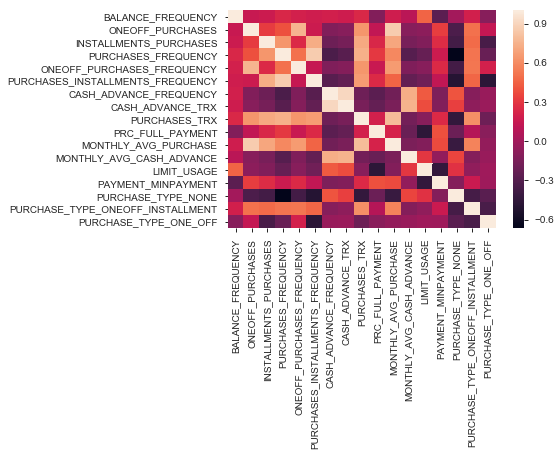

In [34]:
sns.heatmap(credit_new.corr())

# Standardising data

In [37]:
scalor=StandardScaler()
credit_scaled=scalor.fit_transform(credit_new)

In [39]:
pd.DataFrame(credit_scaled,columns=credit_new.columns).head()

BALANCE_FREQUENCY  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0          -0.289414         -0.600394               -0.483999   
1           0.121796         -0.600394               -0.675642   
2           0.533006          0.435900               -0.675642   
3          -1.111835          1.408742               -0.675642   
4           0.533006         -0.578948               -0.675642   

   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0            -0.797242                   -0.677221   
1            -1.220490                   -0.677221   
2             1.269205                    2.672431   
3            -1.021315                   -0.409249   
4            -1.021315                   -0.409249   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                         -0.715675               -0.721549         -0.636381   
1                         -0.916882                0.696315          0.295454   
2                         -0.916882               -0.721549         -0.636381   
3                         -0.916882               -0.267832         -0.403422   
4                         -0.916882               -0.721549         -0.636381   

   PURCHASES_TRX  PRC_FULL_PAYMENT  MONTHLY_AVG_PURCHASE  \
0      -0.680426         -0.524666             -0.672442   
1      -0.807798          0.227132             -0.757189   
2      -0.043563         -0.524666             -0.070363   
3      -0.744112         -0.524666              0.574462   
4      -0.744112         -0.524666             -0.743011   

   MONTHLY_AVG_CASH_ADVANCE  LIMIT_USAGE  PAYMENT_MINPAYMENT  \
0                 -0.600125    -0.991428           -0.561165   
1                  2.868029     0.218997           -0.166690   
2                 -0.600125    -0.155658           -0.637408   
3                 -0.460356    -0.472674           -0.754342   
4                 -0.600125     0.853029           -0.342380   

   PURCHASE_TYPE_NONE  PURCHASE_TYPE_ONEOFF_INSTALLMENT  PURCHASE_TYPE_ONE_OFF  
0           -0.543690                         -0.670193              -0.514625  
1            1.839282                         -0.670193              -0.514625  
2           -0.543690                         -0.670193               1.943162  
3           -0.543690                         -0.670193               1.943162  
4           -0.543690                         -0.670193               1.943162

# Applying PCA for variable reduction

In [40]:
from sklearn.decomposition import PCA

In [41]:
pc = PCA(n_components=17)

In [42]:
pc=pc.fit(credit_scaled)

In [43]:
np.round(pc.explained_variance_ratio_, decimals=4)*100

array([35.61, 17.11, 11.21,  9.42,  5.78,  4.6 ,  3.76,  2.58,  2.29,
        2.01,  1.72,  1.54,  0.88,  0.64,  0.47,  0.23,  0.14])

In [44]:
np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)

array([35.61, 52.72, 63.93, 73.35, 79.13, 83.73, 87.49, 90.07, 92.36,
       94.37, 96.09, 97.63, 98.51, 99.15, 99.62, 99.85, 99.99])

In [ ]:
# 5 components explain 79% of variance and each component have >0.8 variance
# So, we are choosing 5 components

# Building Final PCA

In [45]:
pc_final=PCA(n_components=5).fit(credit_scaled)
reduced_cr=pc_final.fit_transform(credit_scaled)

In [46]:
reduced_cr.shape

(8950, 5)

In [47]:
credit_scaled.shape

(8950, 17)

In [48]:
column=credit_new.columns
column

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PRC_FULL_PAYMENT',
       'MONTHLY_AVG_PURCHASE', 'MONTHLY_AVG_CASH_ADVANCE', 'LIMIT_USAGE',
       'PAYMENT_MINPAYMENT', 'PURCHASE_TYPE_NONE',
       'PURCHASE_TYPE_ONEOFF_INSTALLMENT', 'PURCHASE_TYPE_ONE_OFF'],
      dtype='object')

In [49]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' + str(i) for i in range(5)], index=column)

PC_0      PC_1      PC_2      PC_3  \
BALANCE_FREQUENCY                 0.055110  0.331369 -0.136125 -0.348868   
ONEOFF_PURCHASES                  0.269604  0.170312  0.405219 -0.037811   
INSTALLMENTS_PURCHASES            0.303329  0.115957 -0.238688  0.122818   
PURCHASES_FREQUENCY               0.348926  0.045155 -0.173465 -0.061507   
ONEOFF_PURCHASES_FREQUENCY        0.262232  0.151116  0.393121 -0.111681   
PURCHASES_INSTALLMENTS_FREQUENCY  0.299981  0.041209 -0.413701  0.042118   
CASH_ADVANCE_FREQUENCY           -0.195150  0.436125  0.050833  0.219990   
CASH_ADVANCE_TRX                 -0.175753  0.437683  0.053726  0.244647   
PURCHASES_TRX                     0.350566  0.181320 -0.009311 -0.004621   
PRC_FULL_PAYMENT                  0.158997 -0.189542  0.013377  0.369355   
MONTHLY_AVG_PURCHASE              0.338129  0.175893  0.186723  0.037473   
MONTHLY_AVG_CASH_ADVANCE         -0.169896  0.382331  0.062657  0.293308   
LIMIT_USAGE                      -0.138014  0.350970 -0.087861 -0.369980   
PAYMENT_MINPAYMENT                0.154562 -0.095430  0.237580  0.510268   
PURCHASE_TYPE_NONE               -0.264195  0.111633 -0.076082  0.203713   
PURCHASE_TYPE_ONEOFF_INSTALLMENT  0.272131  0.192091 -0.044975  0.006598   
PURCHASE_TYPE_ONE_OFF            -0.068023 -0.108771  0.536666 -0.269852   

                                      PC_4  
BALANCE_FREQUENCY                -0.026288  
ONEOFF_PURCHASES                 -0.230272  
INSTALLMENTS_PURCHASES            0.019857  
PURCHASES_FREQUENCY               0.299701  
ONEOFF_PURCHASES_FREQUENCY       -0.087629  
PURCHASES_INSTALLMENTS_FREQUENCY  0.229759  
CASH_ADVANCE_FREQUENCY            0.196784  
CASH_ADVANCE_TRX                  0.262085  
PURCHASES_TRX                    -0.032910  
PRC_FULL_PAYMENT                  0.144471  
MONTHLY_AVG_PURCHASE             -0.148122  
MONTHLY_AVG_CASH_ADVANCE          0.222274  
LIMIT_USAGE                      -0.142900  
PAYMENT_MINPAYMENT               -0.120625  
PURCHASE_TYPE_NONE               -0.580968  
PURCHASE_TYPE_ONEOFF_INSTALLMENT -0.213479  
PURCHASE_TYPE_ONE_OFF             0.420499

# Loading Matrix
- Loadings=Eigenvectors * sqrt(Eigenvalues)

- loadings are the covariances/correlations between the original variables and the unit-scaled components.

In [50]:
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=credit_new.columns).T
Loadings

0         1         2         3  \
BALANCE_FREQUENCY                 0.135594  0.565236 -0.187963 -0.441584   
ONEOFF_PURCHASES                  0.663336  0.290511  0.559532 -0.047859   
INSTALLMENTS_PURCHASES            0.746313  0.197794 -0.329584  0.155458   
PURCHASES_FREQUENCY               0.858502  0.077024 -0.239524 -0.077853   
ONEOFF_PURCHASES_FREQUENCY        0.645199  0.257768  0.542828 -0.141361   
PURCHASES_INSTALLMENTS_FREQUENCY  0.738077  0.070292 -0.571244  0.053311   
CASH_ADVANCE_FREQUENCY           -0.480150  0.743924  0.070191  0.278455   
CASH_ADVANCE_TRX                 -0.432425  0.746582  0.074186  0.309664   
PURCHASES_TRX                     0.862537  0.309289 -0.012857 -0.005849   
PRC_FULL_PAYMENT                  0.391197 -0.323313  0.018471  0.467515   
MONTHLY_AVG_PURCHASE              0.831937  0.300032  0.257830  0.047432   
MONTHLY_AVG_CASH_ADVANCE         -0.418014  0.652165  0.086518  0.371258   
LIMIT_USAGE                      -0.339572  0.598670 -0.121320 -0.468307   
PAYMENT_MINPAYMENT                0.380287 -0.162780  0.328055  0.645878   
PURCHASE_TYPE_NONE               -0.650029  0.190419 -0.105055  0.257853   
PURCHASE_TYPE_ONEOFF_INSTALLMENT  0.669555  0.327661 -0.062102  0.008352   
PURCHASE_TYPE_ONE_OFF            -0.167364 -0.185537  0.741037 -0.341568   

                                         4  
BALANCE_FREQUENCY                -0.026050  
ONEOFF_PURCHASES                 -0.228180  
INSTALLMENTS_PURCHASES            0.019677  
PURCHASES_FREQUENCY               0.296979  
ONEOFF_PURCHASES_FREQUENCY       -0.086833  
PURCHASES_INSTALLMENTS_FREQUENCY  0.227672  
CASH_ADVANCE_FREQUENCY            0.194997  
CASH_ADVANCE_TRX                  0.259705  
PURCHASES_TRX                    -0.032611  
PRC_FULL_PAYMENT                  0.143159  
MONTHLY_AVG_PURCHASE             -0.146776  
MONTHLY_AVG_CASH_ADVANCE          0.220255  
LIMIT_USAGE                      -0.141602  
PAYMENT_MINPAYMENT               -0.119529  
PURCHASE_TYPE_NONE               -0.575691  
PURCHASE_TYPE_ONEOFF_INSTALLMENT -0.211540  
PURCHASE_TYPE_ONE_OFF             0.416680

In [51]:
Loadings.to_csv("Loadings.csv")

# Final Selected Variables are:-
PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,
MONTHLY_AVG_CASH_ADVANCE,PAYMENT_MINPAYMENT,PURCHASE_TYPE_ONE_OFF

In [52]:
final_var = ['PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX',
             'MONTHLY_AVG_CASH_ADVANCE','PAYMENT_MINPAYMENT','PURCHASE_TYPE_ONE_OFF']

In [53]:
credit_scaled=pd.DataFrame(credit_scaled, columns=column)
credit_scaled.head(5)

BALANCE_FREQUENCY  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0          -0.289414         -0.600394               -0.483999   
1           0.121796         -0.600394               -0.675642   
2           0.533006          0.435900               -0.675642   
3          -1.111835          1.408742               -0.675642   
4           0.533006         -0.578948               -0.675642   

   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0            -0.797242                   -0.677221   
1            -1.220490                   -0.677221   
2             1.269205                    2.672431   
3            -1.021315                   -0.409249   
4            -1.021315                   -0.409249   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                         -0.715675               -0.721549         -0.636381   
1                         -0.916882                0.696315          0.295454   
2                         -0.916882               -0.721549         -0.636381   
3                         -0.916882               -0.267832         -0.403422   
4                         -0.916882               -0.721549         -0.636381   

   PURCHASES_TRX  PRC_FULL_PAYMENT  MONTHLY_AVG_PURCHASE  \
0      -0.680426         -0.524666             -0.672442   
1      -0.807798          0.227132             -0.757189   
2      -0.043563         -0.524666             -0.070363   
3      -0.744112         -0.524666              0.574462   
4      -0.744112         -0.524666             -0.743011   

   MONTHLY_AVG_CASH_ADVANCE  LIMIT_USAGE  PAYMENT_MINPAYMENT  \
0                 -0.600125    -0.991428           -0.561165   
1                  2.868029     0.218997           -0.166690   
2                 -0.600125    -0.155658           -0.637408   
3                 -0.460356    -0.472674           -0.754342   
4                 -0.600125     0.853029           -0.342380   

   PURCHASE_TYPE_NONE  PURCHASE_TYPE_ONEOFF_INSTALLMENT  PURCHASE_TYPE_ONE_OFF  
0           -0.543690                         -0.670193              -0.514625  
1            1.839282                         -0.670193              -0.514625  
2           -0.543690                         -0.670193               1.943162  
3           -0.543690                         -0.670193               1.943162  
4           -0.543690                         -0.670193               1.943162

In [54]:
credit_scaled=credit_scaled[final_var]
credit_scaled.head()

PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_TRX  \
0            -0.797242                         -0.715675         -0.636381   
1            -1.220490                         -0.916882          0.295454   
2             1.269205                         -0.916882         -0.636381   
3            -1.021315                         -0.916882         -0.403422   
4            -1.021315                         -0.916882         -0.636381   

   PURCHASES_TRX  MONTHLY_AVG_CASH_ADVANCE  PAYMENT_MINPAYMENT  \
0      -0.680426                 -0.600125           -0.561165   
1      -0.807798                  2.868029           -0.166690   
2      -0.043563                 -0.600125           -0.637408   
3      -0.744112                 -0.460356           -0.754342   
4      -0.744112                 -0.600125           -0.342380   

   PURCHASE_TYPE_ONE_OFF  
0              -0.514625  
1              -0.514625  
2               1.943162  
3               1.943162  
4               1.943162

# Segmentation

In [55]:
from sklearn.cluster import KMeans

In [56]:
km_3=KMeans(n_clusters=3,random_state=100)
km_3.fit(credit_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [57]:
km_3.labels_

array([1, 2, 1, ..., 0, 1, 1])

In [58]:
km_3.cluster_centers_

array([[ 1.02304807,  1.06997736, -0.42759064,  0.82000119, -0.42754025,
         0.22126945, -0.49479271],
       [-0.64782221, -0.72290912, -0.31247197, -0.54799219, -0.33726514,
        -0.13345337,  0.46319766],
       [-0.6477659 , -0.56539136,  1.71164832, -0.44818655,  1.77279036,
        -0.15655695, -0.05700022]])

In [59]:
km_4=KMeans(n_clusters=4,random_state=123).fit(credit_scaled)
km_5=KMeans(n_clusters=5,random_state=123).fit(credit_scaled)
km_6=KMeans(n_clusters=6,random_state=123).fit(credit_scaled)
km_7=KMeans(n_clusters=7,random_state=123).fit(credit_scaled)
km_8=KMeans(n_clusters=8,random_state=123).fit(credit_scaled)

In [60]:
# save the cluster labels
credit_merg['cluster_3'] = km_3.labels_
credit_merg['cluster_4'] = km_4.labels_
credit_merg['cluster_5'] = km_5.labels_
credit_merg['cluster_6'] = km_6.labels_
credit_merg['cluster_7'] = km_7.labels_
credit_merg['cluster_8'] = km_8.labels_

In [61]:
credit_merg.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.90               0.82      95.40              0.00   
1  3202.47               0.91       0.00              0.00   
2  2495.15               1.00     773.17            773.17   
3  1666.67               0.64    1499.00           1499.00   
4   817.71               1.00      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4        0.0000                 0.17   
1                     0.0     4647.1695                 0.00   
2                     0.0        0.0000                 1.00   
3                     0.0      205.7900                 0.08   
4                     0.0        0.0000                 0.08   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.00                              0.08   
1                        0.00                              0.00   
2                        1.00                              0.00   
3                        0.08                              0.00   
4                        0.08                              0.00   

   CASH_ADVANCE_FREQUENCY    ...      PAYMENT_MINPAYMENT  PURCHASE_TYPE_NONE  \
0                    0.00    ...                  1.4500                   0   
1                    0.25    ...                  3.8300                   1   
2                    0.00    ...                  0.9900                   0   
3                    0.08    ...                  0.2845                   0   
4                    0.00    ...                  2.7700                   0   

   PURCHASE_TYPE_ONEOFF_INSTALLMENT  PURCHASE_TYPE_ONE_OFF  cluster_3  \
0                                 0                      0          1   
1                                 0                      0          2   
2                                 0                      1          1   
3                                 0                      1          1   
4                                 0                      1          1   

   cluster_4  cluster_5  cluster_6  cluster_7  cluster_8  
0          1          0          5          6          1  
1          2          3          1          1          4  
2          0          2          4          3          3  
3          0          2          4          3          3  
4          0          2          4          3          3  

[5 rows x 30 columns]

# Choosing best clusters using Silhouette Coefficient (SC)

In [62]:
from sklearn import metrics

In [63]:
# calculate SC for K=3 through K=8
k_range = range(3, 9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(reduced_cr)
    scores.append(metrics.silhouette_score(reduced_cr, km.labels_))

In [64]:
scores

[0.28907515971128744,
 0.32918857410286084,
 0.33460229391206453,
 0.30963530242153614,
 0.29890833385335935,
 0.30251888457670445]

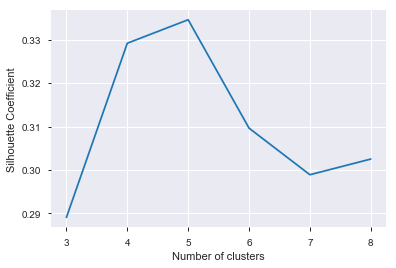

In [65]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

# Segment Distribution & Profiling

In [66]:
credit_merg.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.90               0.82      95.40              0.00   
1  3202.47               0.91       0.00              0.00   
2  2495.15               1.00     773.17            773.17   
3  1666.67               0.64    1499.00           1499.00   
4   817.71               1.00      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4        0.0000                 0.17   
1                     0.0     4647.1695                 0.00   
2                     0.0        0.0000                 1.00   
3                     0.0      205.7900                 0.08   
4                     0.0        0.0000                 0.08   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.00                              0.08   
1                        0.00                              0.00   
2                        1.00                              0.00   
3                        0.08                              0.00   
4                        0.08                              0.00   

   CASH_ADVANCE_FREQUENCY    ...      PAYMENT_MINPAYMENT  PURCHASE_TYPE_NONE  \
0                    0.00    ...                  1.4500                   0   
1                    0.25    ...                  3.8300                   1   
2                    0.00    ...                  0.9900                   0   
3                    0.08    ...                  0.2845                   0   
4                    0.00    ...                  2.7700                   0   

   PURCHASE_TYPE_ONEOFF_INSTALLMENT  PURCHASE_TYPE_ONE_OFF  cluster_3  \
0                                 0                      0          1   
1                                 0                      0          2   
2                                 0                      1          1   
3                                 0                      1          1   
4                                 0                      1          1   

   cluster_4  cluster_5  cluster_6  cluster_7  cluster_8  
0          1          0          5          6          1  
1          2          3          1          1          4  
2          0          2          4          3          3  
3          0          2          4          3          3  
4          0          2          4          3          3  

[5 rows x 30 columns]

In [67]:
# Percentage of values in cluster_3
credit_merg.cluster_3.value_counts()*100/sum(credit_merg.cluster_3.value_counts())

1    43.597765
0    38.770950
2    17.631285
Name: cluster_3, dtype: float64

In [68]:
# Percentage of values in cluster_4
credit_merg.cluster_4.value_counts()*100/sum(credit_merg.cluster_4.value_counts())

3    36.480447
1    30.134078
0    18.234637
2    15.150838
Name: cluster_4, dtype: float64

In [69]:
# number of values in each cluster 
size=pd.concat([pd.Series(credit_merg.cluster_3.size), pd.Series.sort_index(credit_merg.cluster_3.value_counts()), 
                pd.Series.sort_index(credit_merg.cluster_4.value_counts()),pd.Series.sort_index(credit_merg.cluster_5.value_counts()), 
                pd.Series.sort_index(credit_merg.cluster_6.value_counts()),pd.Series.sort_index(credit_merg.cluster_7.value_counts()), 
                pd.Series.sort_index(credit_merg.cluster_8.value_counts())])

In [70]:
size

0    8950
0    3470
1    3902
2    1578
0    1632
1    2697
2    1356
3    3265
0    2348
1    2531
2    1617
3    1278
4    1176
0     546
1    1226
2    1007
3    2506
4    1490
5    2175
0    2410
1    1070
2     405
3    1479
4     920
5     527
6    2139
0     526
1    2109
2     693
3    1457
4    1061
5    2292
6     419
7     393
dtype: int64

In [72]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/credit_merg.cluster_3.size, columns=['Seg_Pct'])
Seg_size.T

0     0     1     2     0     1     2     3     0     1 ...   \
Seg_size  8950  3470  3902  1578  1632  2697  1356  3265  2348  2531 ...    

            5     6    0     1    2     3     4     5    6    7  
Seg_size  527  2139  526  2109  693  1457  1061  2292  419  393  

[1 rows x 34 columns]

In [73]:
Seg_Pct.T

0         0         1         2         0         1         2  \
Seg_Pct  1.0  0.387709  0.435978  0.176313  0.182346  0.301341  0.151508   

                3         0         1    ...            5         6         0  \
Seg_Pct  0.364804  0.262346  0.282793    ...     0.058883  0.238994  0.058771   

                1        2         3         4         5         6         7  
Seg_Pct  0.235642  0.07743  0.162793  0.118547  0.256089  0.046816  0.043911  

[1 rows x 34 columns]

In [74]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([credit_merg.apply(lambda x: x.mean()).T, credit_merg.groupby('cluster_3').apply(lambda x: x.mean()).T, credit_merg.groupby('cluster_4').apply(lambda x: x.mean()).T,
          credit_merg.groupby('cluster_5').apply(lambda x: x.mean()).T, credit_merg.groupby('cluster_6').apply(lambda x: x.mean()).T,
          credit_merg.groupby('cluster_7').apply(lambda x: x.mean()).T, credit_merg.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)


In [75]:
Profling_output

0            0            1  \
BALANCE                           1452.399565  1132.139355  1075.880072   
BALANCE_FREQUENCY                    0.883343     0.936167     0.817737   
PURCHASES                          823.863022  1501.132115   392.225508   
ONEOFF_PURCHASES                   447.948730   692.498711   309.135015   
INSTALLMENTS_PURCHASES             336.336040   735.435653    63.446605   
CASH_ADVANCE                       817.161157   243.787527   366.361269   
PURCHASES_FREQUENCY                  0.490217     0.901130     0.229956   
ONEOFF_PURCHASES_FREQUENCY           0.202177     0.299637     0.150126   
PURCHASES_INSTALLMENTS_FREQUENCY     0.364553     0.789977     0.077104   
CASH_ADVANCE_FREQUENCY               0.127225     0.046700     0.086794   
CASH_ADVANCE_TRX                     2.731732     0.896254     1.391338   
PURCHASES_TRX                       12.684022    25.559654     4.078421   
CREDIT_LIMIT                      4366.500350  4539.026795  3601.012455   
PAYMENTS                          1479.577498  1673.020254   961.356513   
MINIMUM_PAYMENTS                   618.363342   564.502700   471.278883   
PRC_FULL_PAYMENT                     0.153534     0.258216     0.104434   
TENURE                              11.584134    11.678674    11.626602   
MONTHLY_AVG_PURCHASE                71.030672   128.340816    34.260957   
MONTHLY_AVG_CASH_ADVANCE            73.636657    21.176542    32.287253   
LIMIT_USAGE                          0.384011     0.289948     0.387396   
PAYMENT_MINPAYMENT                   4.835694     6.170685     4.030069   
PURCHASE_TYPE_NONE                   0.228156     0.000000     0.310097   
PURCHASE_TYPE_ONEOFF_INSTALLMENT     0.309944     0.580403     0.116863   
PURCHASE_TYPE_ONE_OFF                0.209385     0.008069     0.397745   
cluster_3                            0.788603     0.000000     1.000000   
cluster_4                            1.698771     2.874928     0.602255   
cluster_5                            1.598101     2.003746     0.851615   
cluster_6                            3.083017     2.536888     4.159918   
cluster_7                            2.845363     1.445821     4.500256   
cluster_8                            3.221788     3.730259     2.359559   

                                            2            0            1  \
BALANCE                           3087.685998  1069.874667  1169.424332   
BALANCE_FREQUENCY                    0.929411     0.827439     0.821950   
PURCHASES                          401.889528   714.628811   230.340677   
ONEOFF_PURCHASES                   253.438388   664.898364    99.239114   
INSTALLMENTS_PURCHASES             133.508992     0.000000   124.384909   
CASH_ADVANCE                      3192.717344   316.054228   514.156244   
PURCHASES_FREQUENCY                  0.230184     0.327966     0.194227   
ONEOFF_PURCHASES_FREQUENCY           0.116572     0.327757     0.043589   
PURCHASES_INSTALLMENTS_FREQUENCY     0.139842     0.000000     0.146986   
CASH_ADVANCE_FREQUENCY               0.404271     0.068934     0.112681   
CASH_ADVANCE_TRX                    10.082383     1.205270     1.871709   
PURCHASES_TRX                        5.650190     6.755515     3.190582   
CREDIT_LIMIT                      5879.977535  4113.532567  3370.122358   
PAYMENTS                          2335.630680  1152.825167   916.458789   
MINIMUM_PAYMENTS                  1100.505283   465.844442   505.597219   
PRC_FULL_PAYMENT                     0.044753     0.108609     0.107757   
TENURE                              11.271229    11.577819    11.639600   
MONTHLY_AVG_PURCHASE                35.928787    62.908261    19.672460   
MONTHLY_AVG_CASH_ADVANCE           291.242471    28.253223    45.428665   
LIMIT_USAGE                          0.582484     0.349540     0.420389   
PAYMENT_MINPAYMENT                   3.892174     4.812725     3.506605   
PURCHASE_TYPE_NONE                   0.527250     0.000000     0.497

In [76]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [77]:
Profling_output_final

0            0            1  \
Seg_size                          8950.000000  3470.000000  3902.000000   
Seg_Pct                              1.000000     0.387709     0.435978   
BALANCE                           1452.399565  1132.139355  1075.880072   
BALANCE_FREQUENCY                    0.883343     0.936167     0.817737   
PURCHASES                          823.863022  1501.132115   392.225508   
ONEOFF_PURCHASES                   447.948730   692.498711   309.135015   
INSTALLMENTS_PURCHASES             336.336040   735.435653    63.446605   
CASH_ADVANCE                       817.161157   243.787527   366.361269   
PURCHASES_FREQUENCY                  0.490217     0.901130     0.229956   
ONEOFF_PURCHASES_FREQUENCY           0.202177     0.299637     0.150126   
PURCHASES_INSTALLMENTS_FREQUENCY     0.364553     0.789977     0.077104   
CASH_ADVANCE_FREQUENCY               0.127225     0.046700     0.086794   
CASH_ADVANCE_TRX                     2.731732     0.896254     1.391338   
PURCHASES_TRX                       12.684022    25.559654     4.078421   
CREDIT_LIMIT                      4366.500350  4539.026795  3601.012455   
PAYMENTS                          1479.577498  1673.020254   961.356513   
MINIMUM_PAYMENTS                   618.363342   564.502700   471.278883   
PRC_FULL_PAYMENT                     0.153534     0.258216     0.104434   
TENURE                              11.584134    11.678674    11.626602   
MONTHLY_AVG_PURCHASE                71.030672   128.340816    34.260957   
MONTHLY_AVG_CASH_ADVANCE            73.636657    21.176542    32.287253   
LIMIT_USAGE                          0.384011     0.289948     0.387396   
PAYMENT_MINPAYMENT                   4.835694     6.170685     4.030069   
PURCHASE_TYPE_NONE                   0.228156     0.000000     0.310097   
PURCHASE_TYPE_ONEOFF_INSTALLMENT     0.309944     0.580403     0.116863   
PURCHASE_TYPE_ONE_OFF                0.209385     0.008069     0.397745   
cluster_3                            0.788603     0.000000     1.000000   
cluster_4                            1.698771     2.874928     0.602255   
cluster_5                            1.598101     2.003746     0.851615   
cluster_6                            3.083017     2.536888     4.159918   
cluster_7                            2.845363     1.445821     4.500256   
cluster_8                            3.221788     3.730259     2.359559   

                                            2            0            1  \
Seg_size                          1578.000000  1632.000000  2697.000000   
Seg_Pct                              0.176313     0.182346     0.301341   
BALANCE                           3087.685998  1069.874667  1169.424332   
BALANCE_FREQUENCY                    0.929411     0.827439     0.821950   
PURCHASES                          401.889528   714.628811   230.340677   
ONEOFF_PURCHASES                   253.438388   664.898364    99.239114   
INSTALLMENTS_PURCHASES             133.508992     0.000000   124.384909   
CASH_ADVANCE                      3192.717344   316.054228   514.156244   
PURCHASES_FREQUENCY                  0.230184     0.327966     0.194227   
ONEOFF_PURCHASES_FREQUENCY           0.116572     0.327757     0.043589   
PURCHASES_INSTALLMENTS_FREQUENCY     0.139842     0.000000     0.146986   
CASH_ADVANCE_FREQUENCY               0.404271     0.068934     0.112681   
CASH_ADVANCE_TRX                    10.082383     1.205270     1.871709   
PURCHASES_TRX                        5.650190     6.755515     3.190582   
CREDIT_LIMIT                      5879.977535  4113.532567  3370.122358   
PAYMENTS                          2335.630680  1152.825167   916.458789   
MINIMUM_PAYMENTS                  1100.505283   465.844442   505.597219   
PRC_FULL_PAYMENT                     0.044753     0.108609     0.107757   
TENURE                              11.271229    11.577819    11.639600   
MONTHLY_AVG_PURCHASE                35.928787    62.908261    19.672

In [78]:
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [79]:
Profling_output_final

Overall        KM3_1        KM3_2  \
Seg_size                          8950.000000  3470.000000  3902.000000   
Seg_Pct                              1.000000     0.387709     0.435978   
BALANCE                           1452.399565  1132.139355  1075.880072   
BALANCE_FREQUENCY                    0.883343     0.936167     0.817737   
PURCHASES                          823.863022  1501.132115   392.225508   
ONEOFF_PURCHASES                   447.948730   692.498711   309.135015   
INSTALLMENTS_PURCHASES             336.336040   735.435653    63.446605   
CASH_ADVANCE                       817.161157   243.787527   366.361269   
PURCHASES_FREQUENCY                  0.490217     0.901130     0.229956   
ONEOFF_PURCHASES_FREQUENCY           0.202177     0.299637     0.150126   
PURCHASES_INSTALLMENTS_FREQUENCY     0.364553     0.789977     0.077104   
CASH_ADVANCE_FREQUENCY               0.127225     0.046700     0.086794   
CASH_ADVANCE_TRX                     2.731732     0.896254     1.391338   
PURCHASES_TRX                       12.684022    25.559654     4.078421   
CREDIT_LIMIT                      4366.500350  4539.026795  3601.012455   
PAYMENTS                          1479.577498  1673.020254   961.356513   
MINIMUM_PAYMENTS                   618.363342   564.502700   471.278883   
PRC_FULL_PAYMENT                     0.153534     0.258216     0.104434   
TENURE                              11.584134    11.678674    11.626602   
MONTHLY_AVG_PURCHASE                71.030672   128.340816    34.260957   
MONTHLY_AVG_CASH_ADVANCE            73.636657    21.176542    32.287253   
LIMIT_USAGE                          0.384011     0.289948     0.387396   
PAYMENT_MINPAYMENT                   4.835694     6.170685     4.030069   
PURCHASE_TYPE_NONE                   0.228156     0.000000     0.310097   
PURCHASE_TYPE_ONEOFF_INSTALLMENT     0.309944     0.580403     0.116863   
PURCHASE_TYPE_ONE_OFF                0.209385     0.008069     0.397745   
cluster_3                            0.788603     0.000000     1.000000   
cluster_4                            1.698771     2.874928     0.602255   
cluster_5                            1.598101     2.003746     0.851615   
cluster_6                            3.083017     2.536888     4.159918   
cluster_7                            2.845363     1.445821     4.500256   
cluster_8                            3.221788     3.730259     2.359559   

                                        KM3_3        KM4_1        KM4_2  \
Seg_size                          1578.000000  1632.000000  2697.000000   
Seg_Pct                              0.176313     0.182346     0.301341   
BALANCE                           3087.685998  1069.874667  1169.424332   
BALANCE_FREQUENCY                    0.929411     0.827439     0.821950   
PURCHASES                          401.889528   714.628811   230.340677   
ONEOFF_PURCHASES                   253.438388   664.898364    99.239114   
INSTALLMENTS_PURCHASES             133.508992     0.000000   124.384909   
CASH_ADVANCE                      3192.717344   316.054228   514.156244   
PURCHASES_FREQUENCY                  0.230184     0.327966     0.194227   
ONEOFF_PURCHASES_FREQUENCY           0.116572     0.327757     0.043589   
PURCHASES_INSTALLMENTS_FREQUENCY     0.139842     0.000000     0.146986   
CASH_ADVANCE_FREQUENCY               0.404271     0.068934     0.112681   
CASH_ADVANCE_TRX                    10.082383     1.205270     1.871709   
PURCHASES_TRX                        5.650190     6.755515     3.190582   
CREDIT_LIMIT                      5879.977535  4113.532567  3370.122358   
PAYMENTS                          2335.630680  1152.825167   916.458789   
MINIMUM_PAYMENTS                  1100.505283   465.844442   505.597219   
PRC_FULL_PAYMENT                     0.044753     0.108609     0.107757   
TENURE                              11.271229    11.577819    11.639600   
MONTHLY_AVG_PURCHASE                35.928787    62.908261    

In [80]:
Profling_output_final.to_csv('Profiling_output.csv')

# Final Selecting Best cluster
- On the basis of Silhouette Coefficient,Best Segment Distribution & Profiling 4 cluster solution is best 
- Because it clearly differentiate between clusters
- Characteristics of cluster given below:-

**Cluster-1** - It is 18 % of total customer base, Monthly purchase between Cluster 2 & Cluster 4,Low Monthly cash advance,Low balance,No Installment Purchase, Medium Purchase,Medium Credit Card Limit and prefer only One_of type purchase

**Cluster-2** - It is 30 % of total customer base, Low Monthly purchase, Monthly cash advance between cluster 3 & Cluster 1, Medium Balance, Low Purchase, Less Installment purchase, low credit card limit & prefer no & installment type purchase

**Cluster-3** - It is 15 % of total customer base, Low Monthly purchase but higher than cluster 2, High Monthly cash advance, High Balance, Low purchase, less installment purchase, High credit card limit & prefer no & installment type purchase

**Cluster-4** - It is 36 % of total customer base,High Monthly purchase, Low Monthly advance cash, low balance, High Purchase, High installment purchase, Medium credit card limit & prefer installment type purchase.